<a href="https://colab.research.google.com/github/AmirahTech/Customer-Churn-Analysis/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: importing dataset to dataframe

In [ ]:
#importing the libraries we need
import pandas as pd  #for handling data tables
import numpy as np  #for numerical operations


In [ ]:
from google.colab import files
uploaded = files.upload() #opens button to upload file

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [ ]:
uploaded.keys() #check file name

dict_keys(['WA_Fn-UseC_-Telco-Customer-Churn (1).csv'])

In [ ]:
#then this to upload it to dataframe
import pandas as pd

#load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 2: Data exploration and cleaning which is where we check for missing values understand the columns and figure which values need preprocessing.

In [ ]:
df.shape #checks number of rows and columns

df.info() #check column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#convert totalcharges into numerical
df ['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#dropping customerid as its just an identifier and doesnt help predict churn
df = df.drop ('customerID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#convert all catagorical to numeric
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [ ]:
#now dropping totalchargesmissing values
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
#now dropping totalchargesmissing values
df_encoded = df_encoded.dropna().reset_index(drop=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  Inte

problem occured as features on very different scales so need to scale features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #learns mean & std on training set scaling it
X_test_scaled = scaler.transform(X_test) # uses same scaling on test set


In [ ]:
from sklearn.linear_model import LogisticRegression # a model that predicts probabilities
#Lr better when numbers similar in scale
# Create the model
model = LogisticRegression(max_iter=1000) #ensures conversion
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled) #uses trained model to guess churn for tests set

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# overall accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#confusion matrix,shows true vs predicted
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#shows how good model is at predicting churn vs no churn
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7874911158493249
Confusion Matrix:
 [[915 118]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Before modeling need to understand data,spot patterns,distributions,and any anomolies.

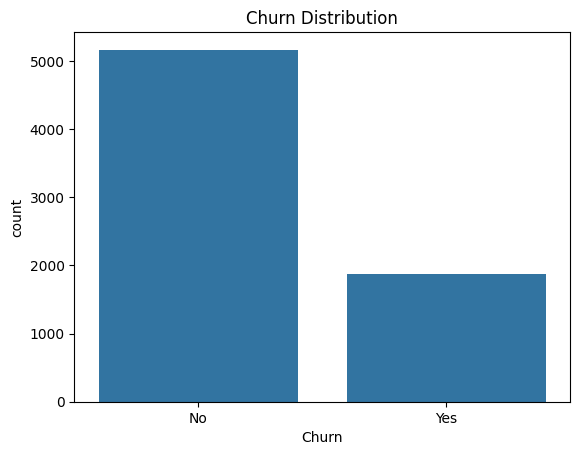

In [ ]:
#Visualise churn distribution

import matplotlib.pyplot as plt
import seaborn as sns

#count how many customers churned vs stayed
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


the model will need special attention to avoid being biased toward predicting “no churn.” thats why we need to also look at precision,recall and f-1 score

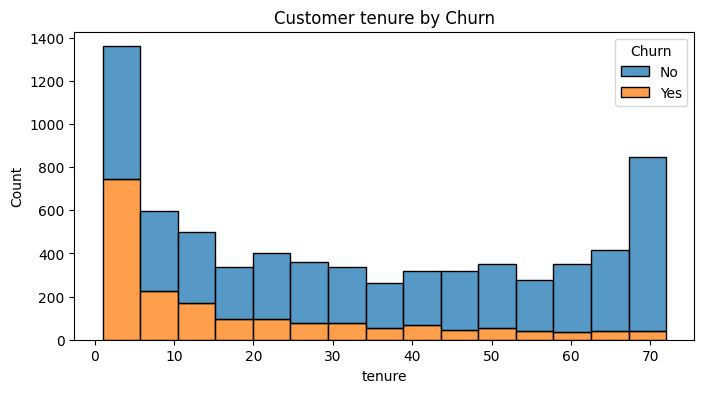

In [ ]:
#plot tenure vs churn
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack') # draws histogram, shows stacked rather than overlap
plt.title('Customer tenure by Churn')
plt.show()



Most customers who churned have a short tenure (0–5 months). After that, the number of churned customers drops significantly, while most long-term customers remain.

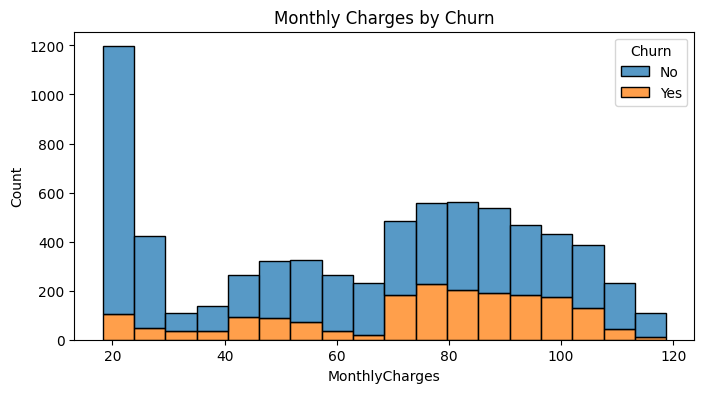

In [ ]:
#plot monthly charges vs churn
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.title('Monthly Charges by Churn')
plt.show()

patterns suggest that new customers and customers with mid-to-high monthly charges are more at risk of leaving, more stay at lower prices

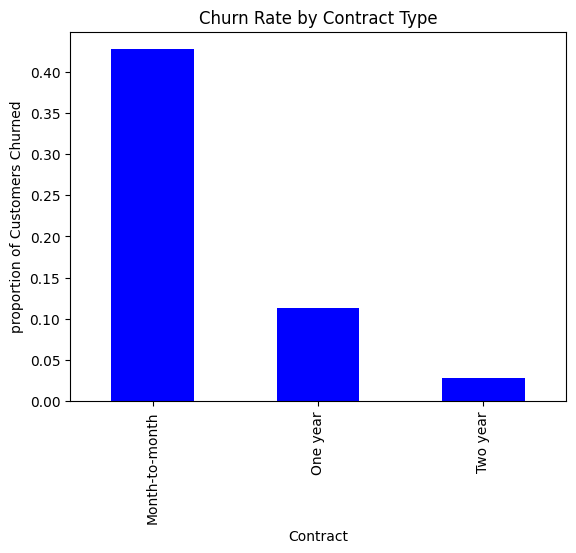

In [ ]:
#churn rate by contract type
#calculates proportion of churned and non-churned customers for each contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() # reshapesd so sepeerate columns yes and no
contract_churn['Yes'].plot(kind='bar', color='blue')#draws bar chart
plt.title('Churn Rate by Contract Type')
plt.ylabel('proportion of Customers Churned')
plt.show()

month to month more customers churned, much lower with one year and two year. Longer commitments reduce likelihood of leaving

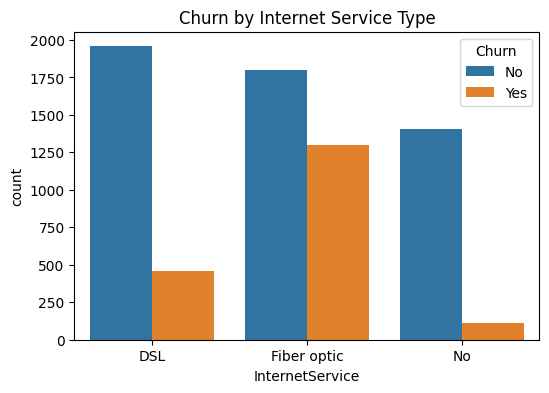

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of churn vs internet service
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn') #counts number of customers in each service
plt.title('Churn by Internet Service Type')
plt.show()


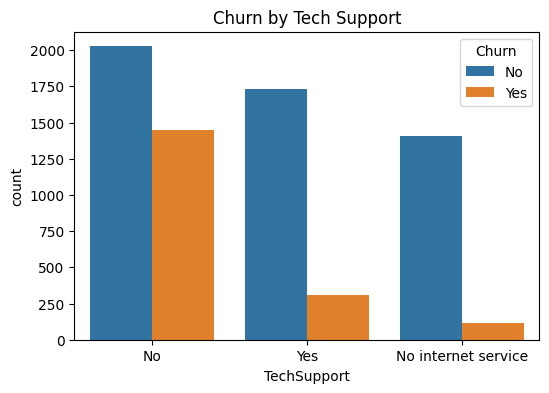

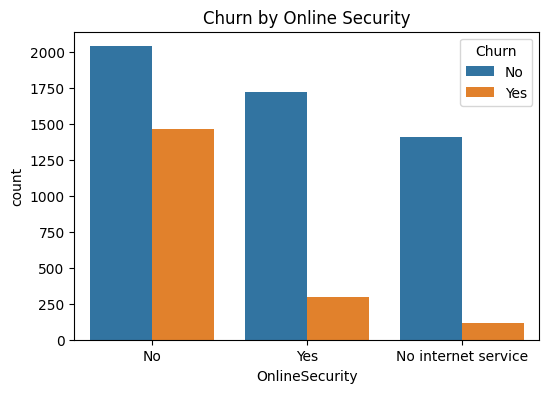

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# techSupport vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn by Tech Support')
plt.show()

# onlineSecurity vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn by Online Security')
plt.show()


both graphs show that customers without TechSupport or OnlineSecurity churn much more than those with it.

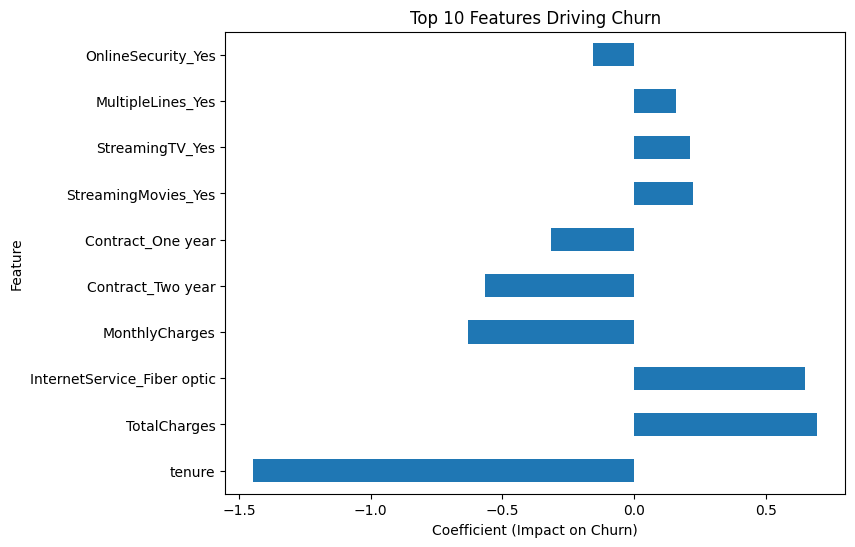

tenure                                  -1.445747
TotalCharges                             0.694885
InternetService_Fiber optic              0.650749
MonthlyCharges                          -0.632801
Contract_Two year                       -0.567396
Contract_One year                       -0.314562
StreamingMovies_Yes                      0.222440
StreamingTV_Yes                          0.212963
MultipleLines_Yes                        0.160546
OnlineSecurity_Yes                      -0.155520
TechSupport_Yes                         -0.143482
PaperlessBilling_Yes                     0.134580
PaymentMethod_Electronic check           0.123558
Dependents_Yes                          -0.099848
SeniorCitizen                            0.094976
StreamingMovies_No internet service     -0.074068
DeviceProtection_No internet service    -0.074068
TechSupport_No internet service         -0.074068
OnlineSecurity_No internet service      -0.074068
InternetService_No                      -0.074068


In [ ]:
import numpy as np

# get the features importance from logistic regression
feature_importance = pd.Series(model.coef_[0], index=X_train.columns)
feature_importance = feature_importance.sort_values(key=np.abs, ascending=False)

# plot
plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind='barh')
plt.title('Top 10 Features Driving Churn')
plt.xlabel('Coefficient (Impact on Churn)')
plt.ylabel('Feature')
plt.show()

# print full sorted list if you want
print(feature_importance)

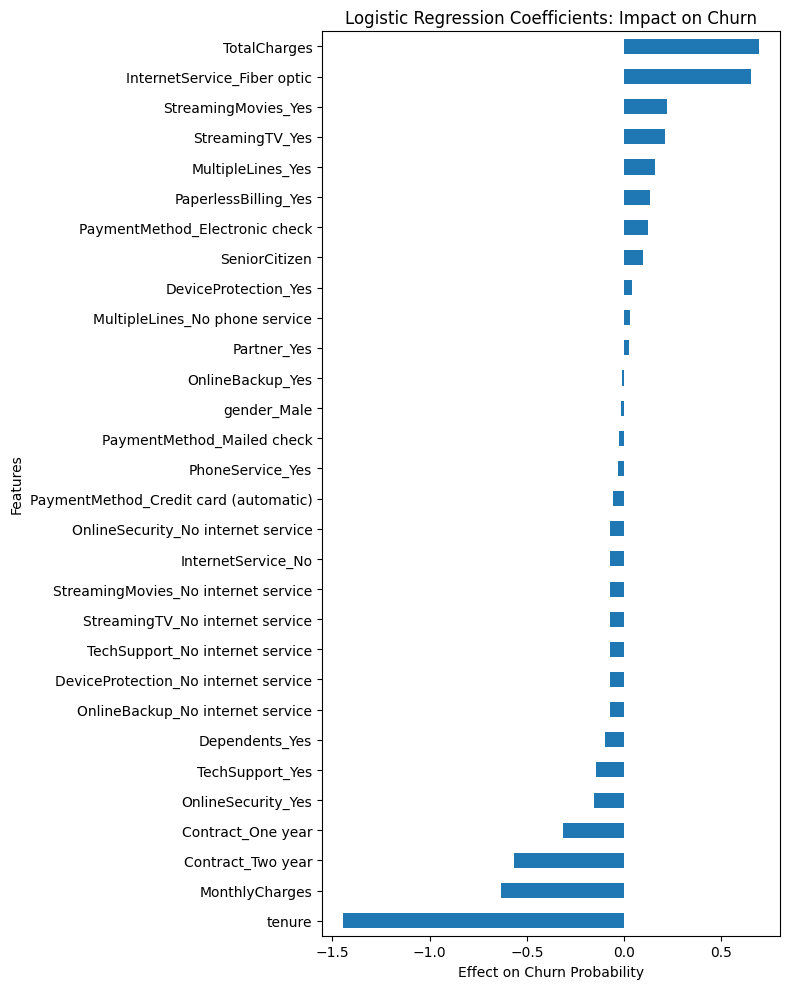

In [ ]:
import matplotlib.pyplot as plt

# sort coefficients by size (absolute value) for clarity
coef = pd.Series(model.coef_[0], index=X_train.columns)
coef = coef.sort_values()

plt.figure(figsize=(8,10))
coef.plot(kind='barh')
plt.title('Logistic Regression Coefficients: Impact on Churn')
plt.xlabel('Effect on Churn Probability')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


features increasing churn risk: higher totalcharges as customers paying more tend to leave, internetservice:fiber customers churn higher rate than DSL.

features reducing churn risk: higher tenure- long term customers are more loyal, lower monthly charges - cheaper plans less churn, contract:1-2 - longer contracts reduce churn

Building stronger models and comparing performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier #importing randomforest
#random forest made up of many decison trees that vote together, improves accuracy and reduces overfitting

#makes black forest to be trained
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)#no of tress in forest,fixes randomness so results are reproducible
rf_model.fit(X_train_scaled, y_train)#train the model

y_pred_rf = rf_model.predict(X_test_scaled)#make predictions

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))#shows overall accuracy
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))#how many churners/non were incorrectly/correctly predicted
print("Classification Report:\n", classification_report(y_test, y_pred_rf))#shows precision


Random Forest Accuracy: 0.7931769722814499
Confusion Matrix:
 [[937  96]
 [195 179]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.91      0.87      1033
        True       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



                           Feature  Importance
3                     TotalCharges    0.195802
2                   MonthlyCharges    0.168231
1                           tenure    0.167302
10     InternetService_Fiber optic    0.038661
28  PaymentMethod_Electronic check    0.035773
25               Contract_Two year    0.029693
4                      gender_Male    0.027900
13              OnlineSecurity_Yes    0.027197
26            PaperlessBilling_Yes    0.024655
19                 TechSupport_Yes    0.024462


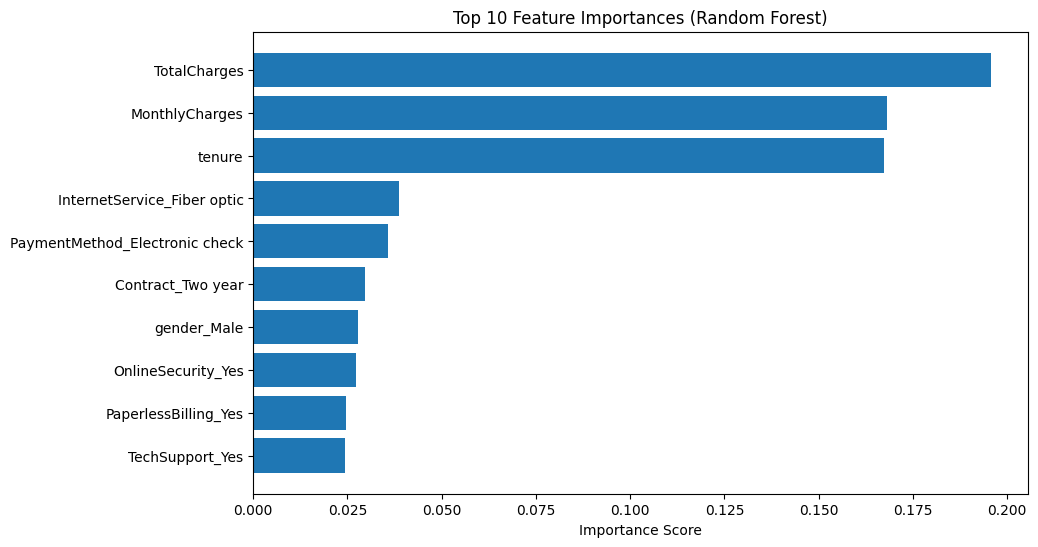

In [ ]:
# get feature importances from the trained random forest
import pandas as pd

importances = rf_model.feature_importances_  # array of importance scores
feature_names = X.columns                    # get the feature names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# sort by importance (largest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# display the top features
print(feature_importance_df.head(10))

# plot for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()  # highest at top
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()



both methods agree tenure,billing amount and contracts are the most important.

Logistic Regression gives direction (positive = churn risk, negative = retention), while Random Forest only gives strength. So we use both together to validate findings.

Gradient Boosting:builds trees sequentially,correcting previous errors.To find out if more advanced model gives better predictive power

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# create and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# predict
y_pred_gb = gb_model.predict(X_test_scaled)

# evaluate
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7896233120113717
Confusion Matrix:
 [[932 101]
 [195 179]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
#automatically tests multiple combinations of parameters and finds best one
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.8055111111111111


Best for accuracy was tuned RandomForest

In [ ]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Tuned Random Forest Accuracy: 0.7953091684434968
Confusion Matrix:
 [[939  94]
 [194 180]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.91      0.87      1033
        True       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.78      1407



handle class imbalance:SMOTE synthetically generate churned customers in the training set so the model gets more examples to learn from, improving recall without changing the test set.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# create SMOTE object
smote = SMOTE(random_state=42)

#resample the training data (only training set)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# train Random Forest on resampled data
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train_res, y_train_res)

# predict on the original test set
y_pred = model.predict(X_test_scaled)

# evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7547974413646056
Confusion Matrix:
 [[797 236]
 [109 265]]
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.77      0.82      1033
        True       0.53      0.71      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



Applied SMOTE to balance the classes.

Accuracy: 0.75 (slightly lower, due to balancing).

Churn recall: 0.71 → much better at detecting customers likely to leave.

Churn precision: 0.53, F1-score: 0.61 → improved balance between precision and recall.

Takeaway: Model now better identifies at-risk customers, which is the main goal.

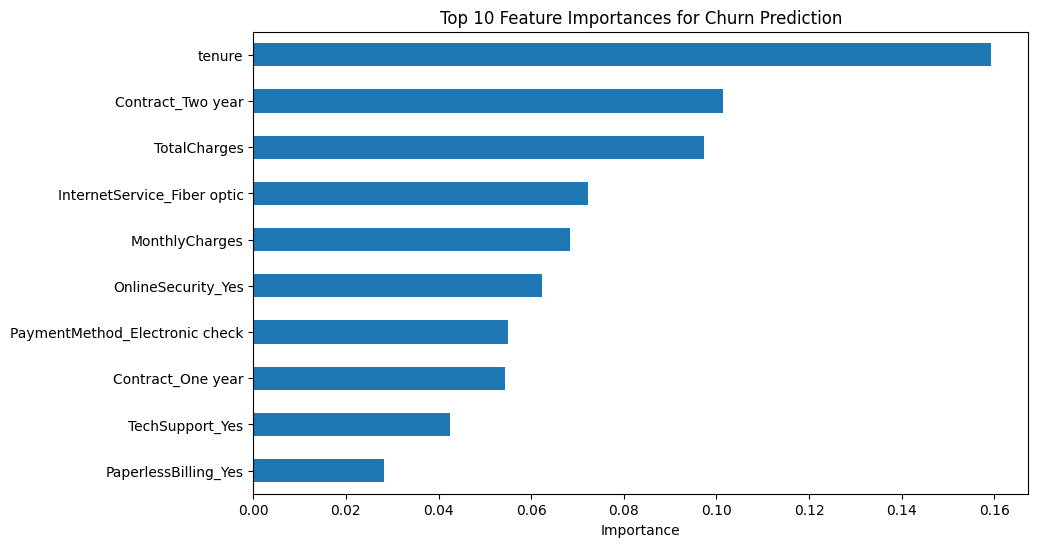

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances from the tuned Random Forest
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10,6))
feature_importances.head(10).plot(kind='barh')
plt.gca().invert_yaxis()  # largest on top
plt.title("Top 10 Feature Importances for Churn Prediction")
plt.xlabel("Importance")
plt.show()


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.7875       0.73    0.70      0.71
1        Random Forest    0.7932       0.74    0.69      0.71
2    Gradient Boosting    0.7896       0.73    0.69      0.71
3  Tuned Random Forest    0.7953       0.74    0.70      0.71
4                SMOTE    0.7548       0.70    0.74      0.71


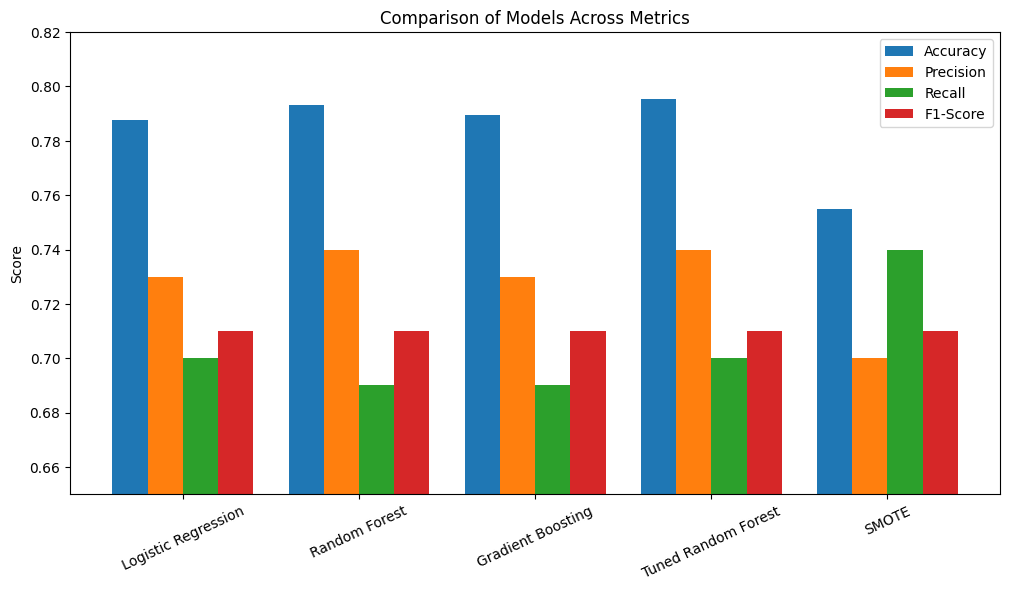

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model (from your outputs)
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Tuned Random Forest', 'SMOTE'],
    'Accuracy': [0.7875, 0.7932, 0.7896, 0.7953, 0.7548],
    'Precision': [0.73, 0.74, 0.73, 0.74, 0.70],
    'Recall': [0.70, 0.69, 0.69, 0.70, 0.74],
    'F1-Score': [0.71, 0.71, 0.71, 0.71, 0.71]
}

df_metrics = pd.DataFrame(data)
print(df_metrics)

# Plot grouped bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(data['Model']))  # label locations
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width - 0.3, df_metrics[metric], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Model'], rotation=25)
ax.set_ylim(0.65, 0.82)
ax.set_ylabel('Score')
ax.set_title('Comparison of Models Across Metrics')
ax.legend()
plt.show()





Telco Customer Churn Project – Summary

1. Dataset Overview:

Dataset: Telco customer information.

Total entries: 7,032, with 20 columns.

Target: Churn_Yes whether a customer left the company.

2. Data Preprocessing:

Handled missing values in TotalCharges.

Converted categorical data (like contract type, internet service) into numbers using one-hot encoding.

Scaled numerical features (tenure, MonthlyCharges, TotalCharges) for better model performance.

3. Exploratory Analysis (EDA):

Most customers did not churn.

Churn was higher for month-to-month contracts and fiber optic internet.

Longer tenure and 1–2 year contracts reduced churn.

Higher monthly charges (especially $65–105) increased churn risk.

Services like Tech Support and Online Security lowered churn.

4. Models Used:

Tried Logistic Regression, Random Forest, Gradient Boosting.

Random Forest (tuned) performed best with 80% accuracy.

Most important features:

TotalCharges

MonthlyCharges

Tenure

InternetService_Fiber optic

5. Evaluation:

Accuracy: 0.80 for best model.

Confusion matrix shows how many churned customers were correctly predicted.

Precision, recall, F1-score help understand false positives vs false negatives.

6. Key Takeaways:

Customers with short tenure and month-to-month plans are most at risk of leaving.

Longer contracts and support services help reduce churn.

Model can help target at-risk customers with special offers or support programs.